In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

%matplotlib inline

# Creating $x_i$, $y_i$ by drawing the data such that $x_i\epsilon\mathscr{N}(0, \sigma^2)$ 

### $$d = 1000, n = 500, \sigma^2 = 1, k = 100$$

### $$y_i = w^T . x_i + \epsilon_i$$

In [2]:
n = 500
d = 1000
k = 100 # k here denotes the number of relevant features
sigma = 1
mu = 0

In [3]:
# Create the feature matrix using the numpy random standard normal with nxd dimension
X = mu + sigma**2 * np.random.standard_normal(size=(n,d))

# gaussian error
error = mu + sigma**2 * np.random.standard_normal(n)

In [4]:
# creating the vector of weights w over the length of features
w_i = []
for j in range(d):
    
    if j in range(k):
        w_j = j/k
    else:
        w_j = 0
        
    w_i.append(w_j)
    
w_i = np.array(w_i)

In [5]:
y = []
for i in range(n):
    y_i = np.inner(w_i, X[i,]) + error[i]
    y.append(y_i)
    
y = (np.array(y)).reshape(-1,1)

# Solving the Lasso coordinate descent algorithm

In [6]:
# Define a function for soft thresholding
def soft_thresh(c_k, lamda):
    """
    The soft threshold function based on a_k, c_k and lamda
    """
    if c_k < - lamda:
        return (c_k + lamda)
    elif c_k >  lamda:
        return (c_k - lamda)
    else: 
        return 0

In [7]:
# function to solve inner loop for the features till d
def inner_loop(weight, X, y, lamda, n_it=100):
    
    n,d = X.shape
    
    for it in range(n_it):
        
        for k_it in range(k):
            X_of_k = X[:,k_it].reshape(-1,1)
            b = X @ weight
            c_k = X_of_k.T @ (y - b  + weight[k_it]*X_of_k)
            
            weight[k_it] =  soft_thresh(c_k, lamda)
            
    return weight.flatten()

/home/kush/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in matmul
  # This is added back by InteractiveShellApp.init_path()
/home/kush/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in matmul
  # This is added back by InteractiveShellApp.init_path()
/home/kush/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in add
  # This is added back by InteractiveShellApp.init_path()
/home/kush/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in matmul
  # Remove the CWD from sys.path while we load stuff.
/home/kush/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
/home/kush/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: over

(0.0005011872336272725,
 1995.2623149688789,
 -3.9539281277861293e+307,
 7.811950710995771e+307)

/home/kush/anaconda3/lib/python3.7/site-packages/matplotlib/ticker.py:2039: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


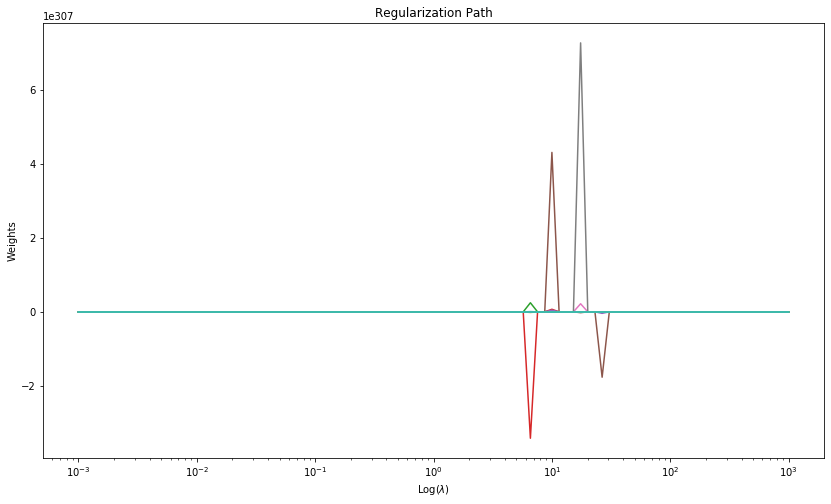

In [8]:
int_weights = np.ones((X.shape[1],1))
weight_list = []
lamda = np.logspace(3.0, -3, num=100)

# the Outer loop for lamda
for lam in lamda:
    weight = inner_loop(int_weights, X, y, lamda=lam)
    weight_list.append(weight)
    
#Stack into numpy array
weights_lasso = np.stack(weight_list).T


#Plot results
n,_ = weights_lasso.shape
plt.figure(figsize = (14,8))

for i in range(n):
    plt.plot(lamda[:len(weight_list)], weights_lasso[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Weights')
plt.title('Regularization Path')
plt.axis('tight')

In [11]:
c = np.array([[ 1, 2, 3],

              [-1, 1, 4]])

In [12]:
c

array([[ 1,  2,  3],
       [-1,  1,  4]])

In [19]:
from tqdm import tqdm
import time
for i in tqdm(range(1000)):
    a = i+5

100%|██████████| 1000/1000 [00:00<00:00, 1293340.73it/s]
